In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('../landis/'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

c:\Users\hengj\Dropbox\My PC (LAPTOP-3RC4T7KN)\Desktop\500\capstone-landis\landis\backend


RFC Test score: 0.8666666666666667
RF Confusion Matrix:


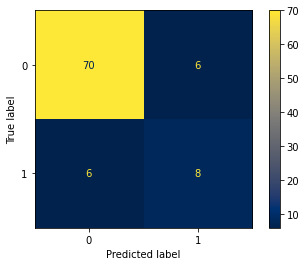

In [18]:
import pickle

from backend.log_parser import parse_keyboard_log
from backend.log_parser import parse_mouse_log
from backend.keyboard_heatmap import KeyboardHeatmap
# This file sucks, dont use it

# List of parsed logfiles
keyboard = []
mouse = []

# Read logfile paths from .routing
with open("../.routing", 'r', encoding='utf-8') as f:
    log_paths = f.read().splitlines()   # Read lines without '\n's
    for path in log_paths:
        path = '../' + path
        if 'key' in path:
            keyboard.append(parse_keyboard_log(path))
        elif 'mouse' in path:
            mouse.append(parse_mouse_log(path))

seg_length = 60

# Empty lists for inserting data
X_actual = []
Y_actual = []

# For confusion matrix plotting
labels = []

target = "MIT"

for k in range(len(keyboard)):
    l = None
    for i in range(int(keyboard[k].time.iloc[-1] / seg_length)):
        # For each segment in each logfile
        # Create a heatmap for that segment
        heatmap = KeyboardHeatmap(keyboard[k], i, seg_length)
        if target!='NON': heatmap = heatmap.to_binary_class_label(target)
        # If the heatmap isn't blank
        if heatmap.class_label() != 'Null':
            X_actual.append(heatmap.heatmap_data().ravel().tolist())
            Y_actual.append(heatmap.class_label())

        l = heatmap.class_label()
    labels.append(l)
labels = list( dict.fromkeys(labels)) # remove duplicate labels for non-binary classification

ctype = "RF"

with open('../classifiers/' + target + '/' + ctype + '.pkl', 'rb') as f:
    classifier = pickle.load(f)

print(f"RFC Test score: {classifier.score(X_actual, Y_actual)}")

# Plotting
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("RF Confusion Matrix:")
y_rf_predict = classifier.predict(X_actual)
ConfusionMatrixDisplay.from_predictions(Y_actual, y_rf_predict, cmap='cividis')
plt.show()